# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [154]:
import numpy as np
import pandas as pd

In [155]:
# откройте данные: ваш код здесь
data = pd.read_csv('data/spam_or_not_spam.csv')
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [156]:
# рассчитайте частоты для классов : ваш код здесь
share_class = data['label'].value_counts()
share_class

label
0    2500
1     500
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x261bb947da0>,
 [Text(-0.9526279098330698, 0.5500000594609756, '0'),
  Text(0.9526278840857078, -0.5500001040567061, '1')],
 [Text(-0.5196152235453108, 0.3000000324332594, '83.3%'),
  Text(0.519615209501295, -0.30000005675820324, '16.7%')])

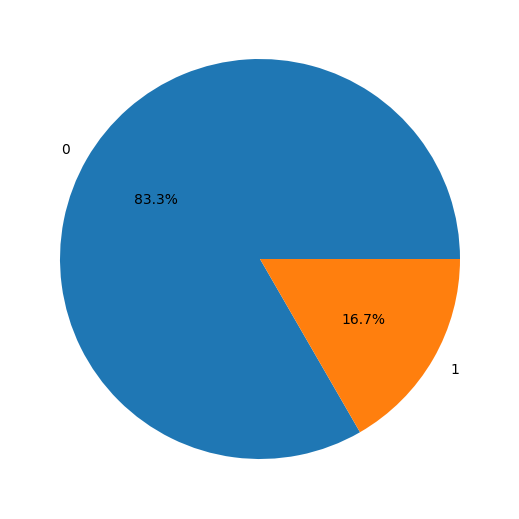

In [157]:
# визуализируйте результат: ваш код здесь
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(share_class, labels = share_class.index, autopct='%.1f%%')

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [158]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [159]:
#ваш код здесь
data.info()
data['email'] = data['email'].replace(' ', np.nan)
data = data.dropna(how='any', axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


Переводим данные в векторный вид:

In [160]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [161]:
#ваш код здесь
print(f'В наборе данных {X.shape[1]} признаков')

В наборе данных 34116 признаков


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [162]:
#ваш код здесь
y = data['label']
X = X

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [163]:
#ваш код здесь
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [164]:
#ваш код здесь
print(f'Среднее значение целевой переменной по тестовой выборке: {round(y_test.mean(),3)}')

Среднее значение целевой переменной по тестовой выборке: 0.165


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [165]:
#ваш код здесь
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics
alpha = 0.01
nb_clf = ComplementNB(alpha=0.01)
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [166]:
#ваш код здесь
print(f'Accurary: {round(metrics.accuracy_score(y_test, y_pred),3)}')
print(f'Precision: {round(metrics.precision_score(y_test, y_pred),3)}')
print(f'Recall: {round(metrics.recall_score(y_test, y_pred),3)}')

Accurary: 0.988
Precision: 1.0
Recall: 0.927


Нарисуйте ROC-кривую:

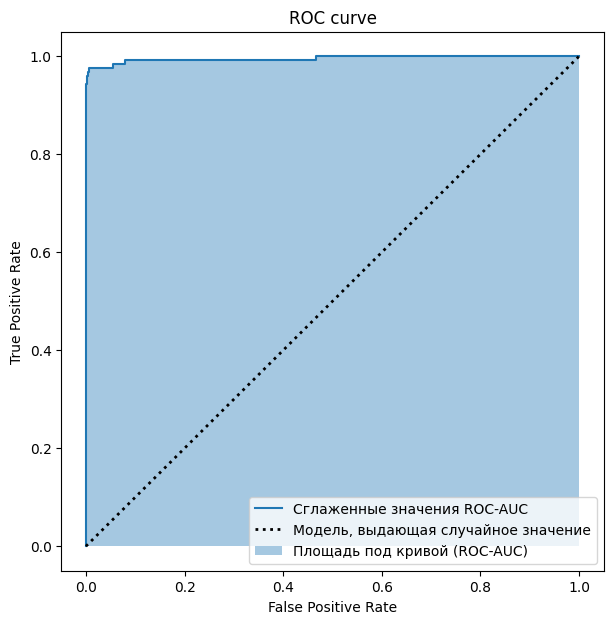

In [167]:
#ваш код здесь
y_predict_proba = nb_clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics. roc_curve (y_test, y_predict_proba)

plt.figure(figsize=(7, 7))

# рисуем кривую
plt.plot(fpr, tpr, 
         label='Сглаженные значения ROC-AUC')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', 
         label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(fpr, tpr, step="pre", 
                 alpha=0.4, label='Площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()


## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [168]:
#ваш код здесь
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=ComplementNB(),
    param_grid={'alpha':list(np.linspace(0.01, 0.3, num=40))},
    cv=5,
    n_jobs=-1
    )
grid_search.fit(X_train, y_train)
y_test_pred = grid_search.predict(X_test)

print(f'наилучшее значение параметра alpha {grid_search.best_params_}')
print(f'Accurary: {round(metrics.accuracy_score(y_test, y_test_pred),3)}')
print(f'Precision: {round(metrics.precision_score(y_test, y_test_pred),3)}')
print(f'Recall: {round(metrics.recall_score(y_test, y_test_pred),3)}')

наилучшее значение параметра alpha {'alpha': 0.20333333333333334}
Accurary: 0.995
Precision: 0.992
Recall: 0.976
